In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
def erode(img,kernel):
    height, width = img.shape
    h = kernel.shape[0]
    w = kernel.shape[1]
    erosion = np.zeros((height,width),np.uint8)
    _,Result = cv2.threshold(img,66,1,cv2.THRESH_BINARY)                        # 将图像中的像素映射到0和1 主要调第二个参数值
    for i in range(h//2,height-h//2):                                           # // 代表向下取整整除
        for j in range(h//2,width-h//2):
            if np.sum(Result[i-h//2:i+h//2+1,j-h//2:j+h//2+1]*kernel)< 9:       # *为普通的点乘 与运算
                erosion[i,j] = 0                                                # 前景为白色,若该位置像素点不存在，则另其为0（黑色，背景色）
            else:
                erosion[i,j] = np.max(img[i-h//2:i+h//2+1,j-h//2:j+h//2+1])     # 取模板覆盖中的最大值
    return erosion


In [5]:
def dilate(img,kernel):
    height, width = img.shape
    h = kernel.shape[0]
    w = kernel.shape[1]
    dilation = np.zeros((height,width),np.uint8)
    _,Result = cv2.threshold(img,30,1,cv2.THRESH_BINARY)                        # 将图像中的像素映射到0和1 主要调第二个参数值
    for i in range(h//2,height-h//2):                                           # // 代表向下取整整除
        for j in range(h//2,width-h//2):
            if np.sum(Result[i-h//2:i+h//2+1,j-h//2:j+h//2+1]*kernel)< 1:       # *为普通的点乘 与运算
                dilation[i,j] = 0                                               # 前景为白色
            else:
                dilation[i,j] = np.max(img[i-h//2:i+h//2+1,j-h//2:j+h//2+1])
    return dilation

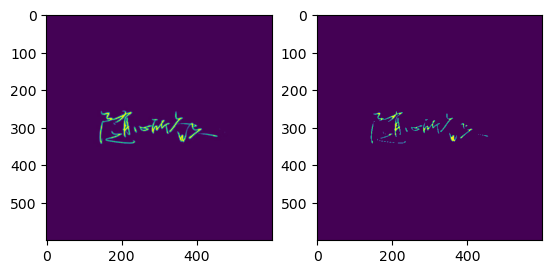

In [8]:
img = cv2.imread('Images/words2.jpeg',0)
info = img.shape
height = info[0]
width = info[1]
cv2.imshow('Words',img)

kernel = np.ones((3,3),np.uint8)   # 定义一个3*3的结构元素
Erosion = erode(img,kernel)
erosion = cv2.erode(img, kernel)   # 腐蚀   cv2.erode()函数默认白色为前景目标，黑色为背景
dilation = cv2.dilate(img, kernel) # 膨胀
Dilation = dilate(img,kernel)  
#cv2.imshow('Erode_Hand',Erosion)      
#cv2.imshow('Erode_OpenCv',erosion)    
cv2.imshow('Dilatione_OpenCv',dilation)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(Erosion)
#cv2.imshow('Dilatione_Hand',Dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()